<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/imntegral%20de%20fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La función pulso unitario es una función definida por partes como:

$
f(x) =
\begin{cases}
1, & \text{si } -1 \leq x \leq 1 \\\\
0, & \text{en otro caso}
\end{cases}
$
Esta función es **par**, **acotada** y presenta discontinuidades en $ x = -1$ y $x = 1$. Es un ejemplo clásico de función que puede representarse mediante una integral de Fourier, ya que es absolutamente integrable sobre $ \mathbb{R}$.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

a) Grafique esta función.

Definimos las variables

In [19]:
#definimos las variables simbolicamnete
x, v, w = sp.symbols('x v w', real=True)

In [20]:
# Definición simbólica de la función pulso unitario
f = sp.Piecewise((1, sp.And(x >= -1, x <= 1)), (0, True))
f


Piecewise((1, (x >= -1) & (x <= 1)), (0, True))

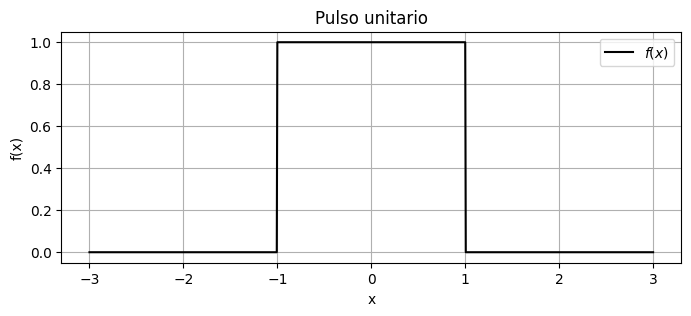

In [21]:
#graficamos el pulso unitario
def plot_pulse():
    xx = np.linspace(-3, 3, 1000)
    ff = np.piecewise(xx, [(-1 <= xx) & (xx <= 1)], [1, 0])
    plt.figure(figsize=(8, 3))
    plt.plot(xx, ff, label=r'$f(x)$', color='black')
    plt.title('Pulso unitario')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_pulse()

b) Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. Grafique el resultado sobre la función original y compare

Eq(A(w), Piecewise((2*sin(w)/(pi*w), (w > 0) | (w < 0)), (2/pi, True)))

<lambdifygenerated-5201>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(3.0*w)
<ipython-input-26-3753724830>:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_aprox = np.trapz(integrand(wi), wi)
<lambdifygenerated-5202>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.98496240601504*w)
<lambdifygenerated-5203>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.96992481203007*w)
<lambdifygenerated-5204>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi

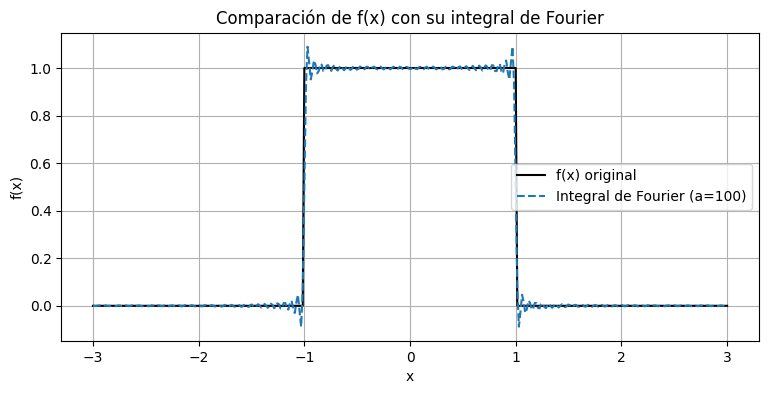

In [26]:


# Variables adicionales
w, v = sp.symbols('w v', real=True)

# Cálculo simbólico de A(w) (sólo se integra de -1 a 1 porque fuera de ahí f = 0)
A_w = (1/sp.pi) * sp.integrate(sp.cos(w * v), (v, -1, 1))
A_w = sp.simplify(A_w)
display(sp.Eq(sp.Function('A')(w), A_w))

# Aproximación de la integral de Fourier: f(x) ≈ ∫₀^a A(w) cos(wx) dw
# Usamos valores grandes de a para acercarnos a la integral infinita

# Función lambda que evalúa la integrando numéricamente para un valor fijo de x
f_fourier_num = lambda x_val: sp.lambdify(w, A_w * sp.cos(w * x_val), 'numpy')

# Graficar f(x) original y su aproximación por integral de Fourier
def plot_fourier_vs_original(a=100):
    xx = np.linspace(-3, 3, 400)
    yy_original = np.piecewise(xx, [(-1 <= xx) & (xx <= 1)], [1, 0])
    yy_approx = []

    for xi in xx:
        integrand = f_fourier_num(xi)
        wi = np.linspace(0, a, 2000)  # intervalo de integración finito
        integral_aprox = np.trapz(integrand(wi), wi)
        yy_approx.append(integral_aprox)

    # Gráfica
    plt.figure(figsize=(9, 4))
    plt.plot(xx, yy_original, label='f(x) original', color='black')
    plt.plot(xx, yy_approx, '--', label=f'Integral de Fourier (a={a})')
    plt.title('Comparación de f(x) con su integral de Fourier')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Ejecutar con a=100
plot_fourier_vs_original(a=100)

In [22]:
#Calculamos la integral de fourier

A=(1/sp.pi)*sp.integrate(sp.cos(w*v), (v, -1, 1))
A=sp.simplify(A)
A

Piecewise((2*sin(w)/(pi*w), (w > 0) | (w < 0)), (2/pi, True))

Damos la representacion simbolica de la integral de fourier

<lambdifygenerated-3601>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(3.0*w)
<ipython-input-23-702037441>:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(integrand(w_vals), w_vals)
<lambdifygenerated-3602>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.98496240601504*w)
<lambdifygenerated-3603>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.96992481203007*w)
<lambdifygenerated-3604>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),

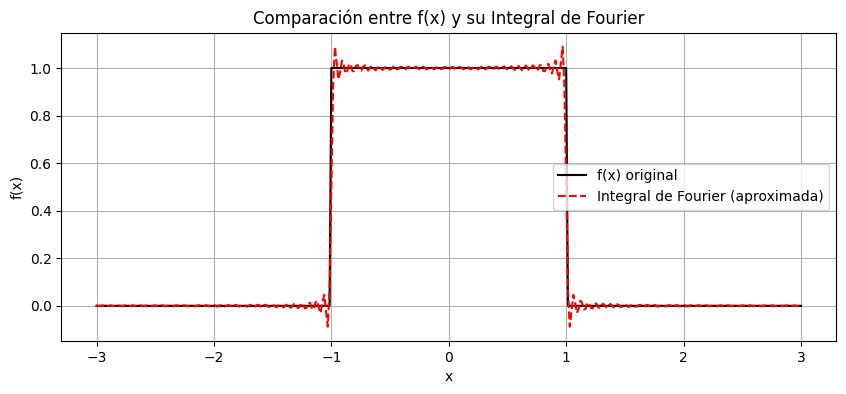

In [23]:
# Aproximación numérica de la integral impropia con trapz
def f_fourier_num(x_val, a_max=100):
    integrand = sp.lambdify(w, A_simpl * sp.cos(w * x_val), 'numpy')
    w_vals = np.linspace(0, a_max, 3000)
    return np.trapz(integrand(w_vals), w_vals)

# Gráfica comparativa
def plot_fourier_vs_original():
    xx = np.linspace(-3, 3, 400)
    f_original = np.piecewise(xx, [(-1 <= xx) & (xx <= 1)], [1, 0])
    f_aprox = [f_fourier_num(xi) for xi in xx]

    plt.figure(figsize=(10, 4))
    plt.plot(xx, f_original, label='f(x) original', color='black')
    plt.plot(xx, f_aprox, '--', label='Integral de Fourier (aproximada)', color='red')
    plt.title('Comparación entre f(x) y su Integral de Fourier')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_fourier_vs_original()


<lambdifygenerated-4001>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(3.0*w)
<ipython-input-24-29119283>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(integrand(wi), wi)
<lambdifygenerated-4002>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.98496240601504*w)
<lambdifygenerated-4003>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.96992481203007*w)
<lambdifygenerated-4004>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], de

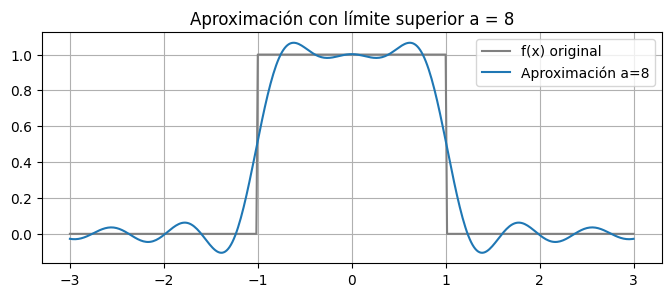

<lambdifygenerated-4401>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(3.0*w)
<lambdifygenerated-4402>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.98496240601504*w)
<lambdifygenerated-4403>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.96992481203007*w)
<lambdifygenerated-4404>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.95488721804511*w)
<lambdifygenerated-4405>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/

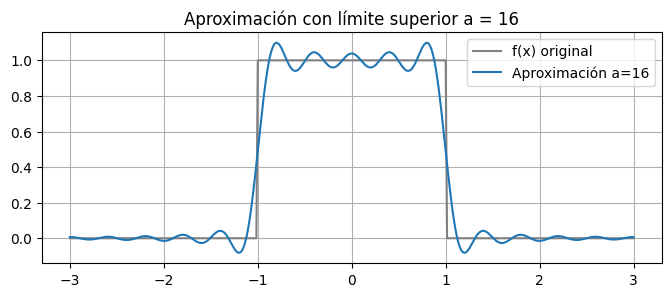

<lambdifygenerated-4801>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(3.0*w)
<lambdifygenerated-4802>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.98496240601504*w)
<lambdifygenerated-4803>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.96992481203007*w)
<lambdifygenerated-4804>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.95488721804511*w)
<lambdifygenerated-4805>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/

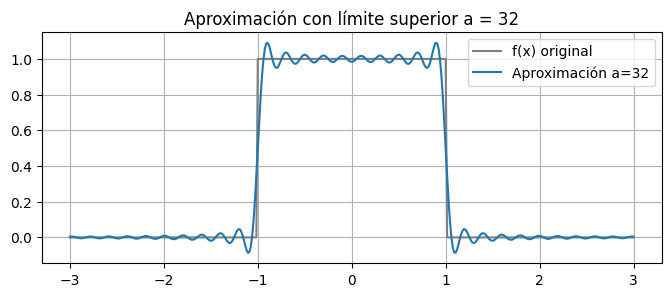

In [24]:




# c) Aproximaciones con a = 8, 16, 32

def aproximacion_con_a(a):
    def f_aprox(xval):
        integrand = sp.lambdify(w, A * sp.cos(w * xval), 'numpy')
        wi = np.linspace(0, a, 2000)
        return np.trapz(integrand(wi), wi)

    xx = np.linspace(-3, 3, 400)
    yy = np.piecewise(xx, [(-1 <= xx) & (xx <= 1)], [1, 0])
    yy_aprox = [f_aprox(xi) for xi in xx]

    plt.figure(figsize=(8, 3))
    plt.plot(xx, yy, label='f(x) original', color='gray')
    plt.plot(xx, yy_aprox, label=f'Aproximación a={a}')
    plt.title(f'Aproximación con límite superior a = {a}')
    plt.legend()
    plt.grid(True)
    plt.show()

for a_val in [8, 16, 32]:
    aproximacion_con_a(a_val)